In [78]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from utils import get_file_data, get_config, get_file_avg

In [79]:
file_path = '../output/state/'
files = sorted(os.listdir(file_path))
print(files)

['critical_prob=0.0&num_states=1&num_tasks=20&period=[10, 100]&task_max_utilization=0.1.txt', 'critical_prob=0.0&num_states=2&num_tasks=20&period=[10, 100]&task_max_utilization=0.1.txt', 'critical_prob=0.0&num_states=3&num_tasks=20&period=[10, 100]&task_max_utilization=0.1.txt', 'critical_prob=0.0&num_states=4&num_tasks=20&period=[10, 100]&task_max_utilization=0.1.txt', 'critical_prob=0.0&num_states=5&num_tasks=20&period=[10, 100]&task_max_utilization=0.1.txt', 'critical_prob=0.0&num_states=6&num_tasks=20&period=[10, 100]&task_max_utilization=0.1.txt', 'critical_prob=0.1&num_states=1&num_tasks=20&period=[10, 100]&task_max_utilization=0.1.txt', 'critical_prob=0.1&num_states=2&num_tasks=20&period=[10, 100]&task_max_utilization=0.1.txt', 'critical_prob=0.1&num_states=3&num_tasks=20&period=[10, 100]&task_max_utilization=0.1.txt', 'critical_prob=0.1&num_states=4&num_tasks=20&period=[10, 100]&task_max_utilization=0.1.txt', 'critical_prob=0.1&num_states=5&num_tasks=20&period=[10, 100]&task_ma

In [80]:
cfg = get_config('../cfg/state_exp_cfg.json')
state_less = {}
state_wise = {}

critical_prob_list = cfg['critical_prob_list']


for state_num in cfg['num_states_list'] :
    state_less[str(state_num)] = [ 0.0 ] * len(critical_prob_list)
    state_wise[str(state_num)] = [ 0.0 ] * len(critical_prob_list)

In [81]:
critical_prob_index = {str(p): i for i, p in enumerate(critical_prob_list)}

for file in files :
    if not file.endswith('.txt') :
        continue
    _params = [p.split('=') for p in file[:-4].split('&')]
    params = {k: v for k, v in _params}
    core_less, core_wise = get_file_avg(file_path + file)

    num_states = params['num_states']
    critical_prob = params['critical_prob']

    state_less[num_states][critical_prob_index[critical_prob]] += core_less
    state_wise[num_states][critical_prob_index[critical_prob]] += core_wise


In [82]:
print(state_less)
print(state_wise)

{'1': [4.2, 4.6, 5.6, 7.0, 6.8, 6.8, 7.0, 8.8, 7.8, 9.6, 10.2], '2': [4.2, 4.6, 5.6, 7.0, 6.8, 6.8, 7.0, 8.8, 7.8, 9.6, 10.2], '3': [4.2, 4.6, 5.6, 7.0, 6.8, 6.8, 7.0, 8.8, 7.8, 9.6, 10.2], '4': [4.2, 4.6, 5.6, 7.0, 6.8, 6.8, 7.0, 8.8, 7.8, 9.6, 10.2], '5': [4.2, 4.6, 5.6, 7.0, 6.8, 6.8, 7.0, 8.8, 7.8, 9.6, 10.2], '6': [4.2, 4.6, 5.6, 7.0, 6.8, 6.8, 7.0, 8.8, 7.8, 9.6, 10.2]}
{'1': [4.2, 4.6, 5.6, 7.0, 6.8, 6.8, 7.0, 8.8, 7.8, 9.6, 10.2], '2': [4.2, 4.6, 5.4, 6.0, 6.6, 6.4, 6.2, 7.2, 6.8, 7.0, 7.4], '3': [4.2, 4.4, 5.2, 6.4, 5.8, 6.2, 6.2, 6.6, 6.4, 7.4, 6.8], '4': [4.2, 4.6, 5.4, 6.0, 6.2, 6.2, 6.6, 7.0, 6.2, 6.8, 6.8], '5': [4.2, 4.2, 5.2, 6.4, 6.2, 6.0, 6.0, 6.4, 6.6, 6.8, 6.8], '6': [4.2, 4.6, 5.2, 6.0, 5.8, 5.8, 5.8, 6.4, 6.2, 6.4, 6.8]}


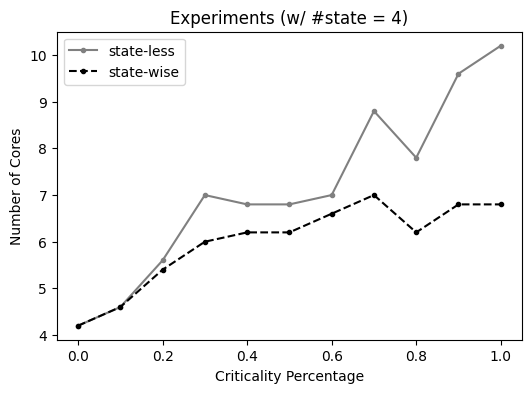

In [86]:
# Compare state-wise and state-less with criticality probability (#state = vis_state_num)

vis_state_num = '4'

plt.figure(figsize=(6,4))

ax = plt.gca()

# plt.plot(critical_prob_list, state_less[vis_state_num], label='state-less', color='gray')

# critical_prob_list.pop(9)
# state_wise[vis_state_num].pop(9)

# plt.plot(critical_prob_list, state_wise[vis_state_num], label='state-wise', color='black', linestyle='dashed')

plt.plot(critical_prob_list, state_less[vis_state_num], label='state-less', color='gray', marker='.')
plt.plot(critical_prob_list, state_wise[vis_state_num], label='state-wise', color='black', linestyle='dashed', marker='.')

plt.title(f'Experiments (w/ #state = {vis_state_num})')
plt.xlabel('Criticality Percentage')
plt.ylabel('Number of Cores')
plt.legend()

# ax.set_ylim([3, 9])
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.show()

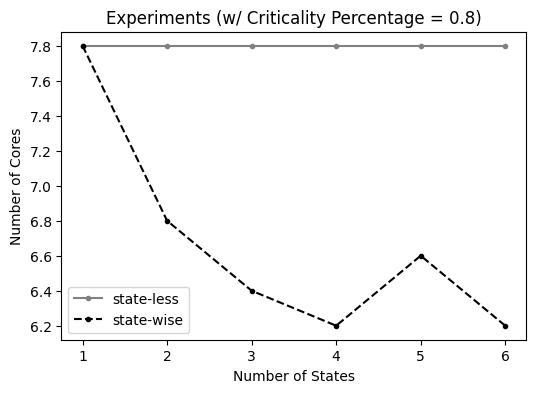

In [84]:
# Compare state-wise and state-less with #states (#critical_prob = vis_critical_prob)

vis_critical_prob = '0.8'

plt.figure(figsize=(6,4))

ax = plt.gca()

index = critical_prob_index[vis_critical_prob]
state_list = cfg['num_states_list']

def get_state_list(output_dict, index) :
    return [output_dict[str(s)][index] for s in state_list]

plt.plot(state_list, get_state_list(state_less, index), label='state-less', color='gray', marker='.')
plt.plot(state_list, get_state_list(state_wise, index), label='state-wise', color='black', linestyle='dashed', marker='.')

plt.title(f'Experiments (w/ Criticality Percentage = {vis_critical_prob})') 
plt.xlabel('Number of States')
plt.ylabel('Number of Cores')
plt.legend()

# ax.set_ylim([3, 8])
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
# ax.yaxis.set_major_locator(plt.AutoLocator())
# ax.yaxis.set_major_locator(plt.IndexLocator(base=1, offset=0))

plt.show()